<a href="https://colab.research.google.com/github/evarahma61/fetal-health-classification/blob/main/Klasifikasi%20status%20kesehatan%20janin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasifikasi status kesehatan janin menggunakan metode Regresi Logistik<br> 


<h5> Klasifikasi kesehatan Janin <br>
Dalam notebook ini digunakan machine learning untuk klasifikasi kesehatan janin guna untuk meningkatkan kesehatan janin dan mencegah tingginya angka kematian janin 


<h2> Akuisisi Data
<h5> *   Dataset
    Menggunakan dataset yang tersedia di kaggle. Berupa data dari hasil pemerikasaan menggunakan kardiotokogram 
    Dataset berisi 2126 record dan 21 kolom feature dan 1 kolom target <br>
    https://www.kaggle.com/andrewmvd/fetal-health-classification





## Import Library

In [ ]:
# Import library
import numpy as np
import pandas as pd

# Untuk Data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Untuk Algorithma
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

# Untuk mengecek performa model
from sklearn.metrics import classification_report, confusion_matrix


<h3> Membuka Dataset

In [ ]:
# Membuka Dataset
data = pd.read_csv('fetal_health.csv')

## Exploratory Data Analysis (EDA)

Dalam langkah ini, dicari informasi dasar tentang tipe data, kolom, missing value, memory usage dll.

In [ ]:
# Menampilkan 5 data teratas
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
print(f"Dataset Columns:{data.columns}")

Dataset Columns:Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')


Dataset ini berisi 2126 record fitur yang diperoleh dari pemeriksaan Kardiotokogram, yang kemudian diklasifikasikan oleh ahli kandungan ke dalam 3 kelas:

1. Normal 
2. Suspect 
3. Pathological 

Kolom Fitur

- 'baseline value' FHR baseline (beats per minute)
- 'accelerations' Number of accelerations per second
- 'fetal_movement' Number of fetal movements per second
- 'uterine_contractions' Number of uterine contractions per second
- 'light_decelerations' Number of light decelerations per second
- 'severe_decelerations' Number of severe decelerations per second
- 'prolongued_decelerations' Number of prolonged decelerations per second
- 'abnormal_short_term_variability' Percentage of time with abnormal short term - variability
- 'mean_value_of_short_term_variability' Mean value of short term variability
- 'percentage_of_time_with_abnormal_long_term_variability' Percentage of time with abnormal long term variability
- 'mean_value_of_long_term_variability' Mean value of long term variability
- 'histogram_width' Width of FHR histogram
- 'histogram_min' Minimum (low frequency) of FHR histogram
- 'histogram_max' Maximum (high frequency) of FHR histogram
- 'histogram_number_of_peaks' Number of histogram peaks
- 'histogram_number_of_zeroes' Number of histogram zeros
- 'histogram_mode' Histogram mode
- 'histogram_mean' Histogram mean
- 'histogram_median' Histogram median
- 'histogram_variance' Histogram variance
- 'histogram_tendency' Histogram tendency

Kolom target

'fetal_health' yang diklasifikasikan menjadi 1 (Normal), 2 (Suspect) and 3 (Pathological)

In [ ]:
# Analisis statistik data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


Method DataFrame.describe() menghasilkan statistik deskriptif, namun hanya untuk kolom yang numerik bukan untuk nilai kategorikal. Metode ini merangkum tendensi sentral, dispersi, dan bentuk distribusi dataset, (nilai NaN tidak termasuk)

- Count : menghitung jumlah baris yang tidak kosong
- Mean : rata-rata
- Std : standar deviasi
- Min : nilai paling kecil
- 25%, 50%, and 75% adalah percentile/quartile dari tiap atribut. kuartil dapat membantu untuk mendeteksi outlier
- Max : nilai tertinggi

In [ ]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

Metode DataFrame.info() mencetak summary dataframe, seperti index, tipe, dtype, dan penggunaan memori

In [ ]:
print(f"The dataset size: {data.shape}")

The dataset size: (2126, 22)


DataFrame.shape mengembalikan dimensi dari data dalam bentuk tuple

### Pre-processing Data

Menghitung missing value

In [ ]:
# Count the missing and null values for dataset fetal healt.
miss_values = data.columns[data.isnull().any()]
print(f"Missing value:\n{data[miss_values].isnull().sum()}")


Missing value:
Series([], dtype: float64)


Pada dataset ini, tidak ditemukan value null atau missing value 

### Visualiasi Data

Text(0, 0.5, 'Jumlah case')

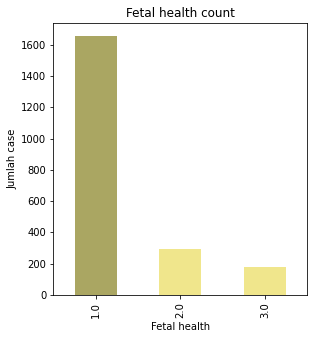

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(121)
# sns.countplot(x="fetal_health", data=data)
vis_fetal_health = data.fetal_health.value_counts().plot(figsize=(10, 5), kind="bar", color = ["#AAA662", "#F0E68C", "#F0E68C"])
plt.title("Fetal health count")
plt.xlabel("Fetal health")
plt.ylabel("Jumlah case")

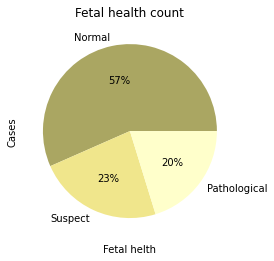

In [ ]:
vis_pie_fetal_health = plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], colors = ["#AAA662", "#F0E68C", "#FFFFCB"], autopct="%1.0f%%")
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")


plt.show()

<h2> Korelasi kolom numerik dengan variabel output (fetal_health)





untuk mendapatkan gambaran awal tentang hubungan antar fitur. maka dicari  korelasi antara fitur numerik dan target "fetal_health", dengan melihat heatmap di bawah ini dapat melihat beberapa fitur memiliki warna gelap, fitur tersebut memiliki korelasi yang tinggi terhadap target.

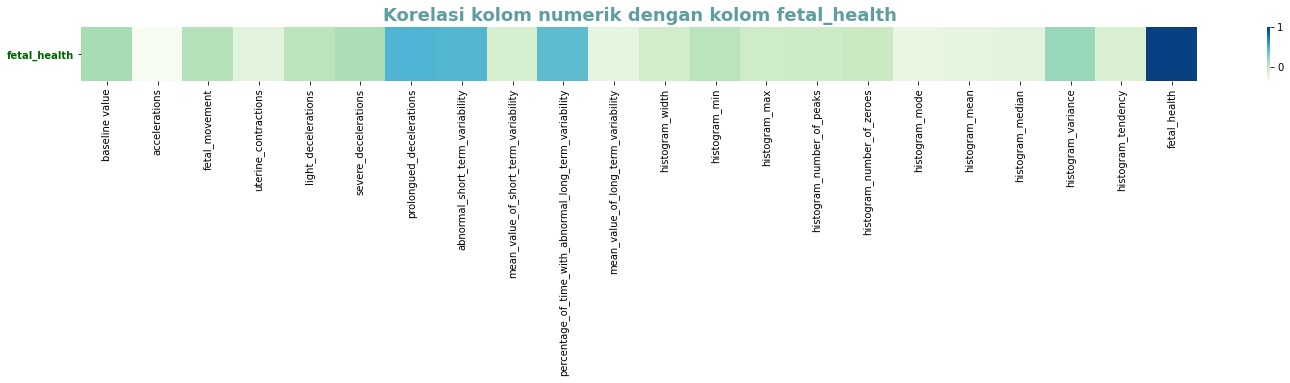

In [ ]:
numeric_data = data.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()
f,ax=plt.subplots(figsize=(25,1))
sns.heatmap(numeric_corr.sort_values(by=["fetal_health"], ascending=False).head(1), cmap="GnBu")
plt.title("Korelasi kolom numerik dengan kolom fetal_health", weight="bold", fontsize=18, color="#5F9EA0")
plt.yticks(weight="bold", color="darkgreen", rotation=0)

plt.show()

Dapat dilihat terdapat kolom yaitu "prolongued_decelerations", "abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability" yang memiliki korelasi yang tinggi terhadap kolom target (fetal_health)

<h1> Data Scaling

feature dengan rentang nilai terbesar biasanya otomatis akan menjadi feature yang paling mendominasi dalam proses training/komputasi, sehingga model yang dihasilkan pun akan sangat bias. Oleh karena itu, sebelum memulai training model, kita terlebih dahulu perlu melakukan data rescaling. 


In [ ]:
columns = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']
scale_X = StandardScaler()
X =  pd.DataFrame(scale_X.fit_transform(data.drop(["fetal_health"],axis = 1),), columns = columns)

In [ ]:
X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352220,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,-1.028560,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.730133,-0.20321,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,0.393176,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,0.926327,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,2.632411,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.988886,-0.20321,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,2.081488,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980


In [ ]:
y = data["fetal_health"]

## Test Train Split

- Train Test Split : Train/test split adalah salah satu metode yang dapat digunakan untuk mengevaluasi performa model machine learning. Metode evaluasi model ini membagi dataset menjadi dua bagian yakni bagian yang digunakan untuk training data dan untuk testing data dengan proporsi tertentu. Train data digunakan untuk fit model machine learning, sedangkan test data digunakan untuk mengevaluasi hasil fit model tersebut.


In [ ]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1488, 21), (638, 21), (1488,), (638,))

## ML Model 

In [ ]:
logistic_regression = linear_model.LogisticRegression()
logistic_regression_mod = logistic_regression.fit(X_train, y_train)
print(f"Logistic Regression: {round(logistic_regression_mod.score(X_test, y_test), 3)}")

pred_logistic_regression = logistic_regression_mod.predict(X_test)

Logistic Regression: 0.893


<h2> Analisis Performa Model

- Classification Report: Laporang yang berisi Precision, Recall and F1-Score.

1. Precision - Presisi adalah rasio data data positif yang diprediksi dengan benar dibandingkan dengan total data yg diprediksi positif/true 

   Precision = TP/TP+FP

2. Recall (Sensitivity) - Recall adalah rasio data positif yang diprediksi dengan benar dibandingkan dengan semua data yang diprediksi dengan benar.

    Recall = TP/TP+FN

4. F1 score - F1 Score is adalah rata-rata tertimbang dari Precision dan Recall. Oleh karena itu, skor ini memperhitungkan false positif dan false negatif.

    F1 Score = 2(Recall Precision) / (Recall + Precision)

In [ ]:
print("Classification Report")
print(classification_report(y_test, pred_logistic_regression))

Classification Report
              precision    recall  f1-score   support

         1.0       0.94      0.95      0.94       497
         2.0       0.62      0.72      0.67        88
         3.0       0.95      0.70      0.80        53

    accuracy                           0.89       638
   macro avg       0.84      0.79      0.81       638
weighted avg       0.90      0.89      0.89       638



## Confusion Matrix
<h5>  confusion matrix memberikan informasi perbandingan hasil klasifikasi yang dilakukan oleh sistem (model) dengan hasil klasifikasi sebenarnya. Confusion matrix berbentuk tabel matriks yang menggambarkan kinerja model klasifikasi pada serangkaian data uji yang nilai sebenarnya diketahui.

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_logistic_regression))

Confusion Matrix:
[[470  26   1]
 [ 24  63   1]
 [  4  12  37]]


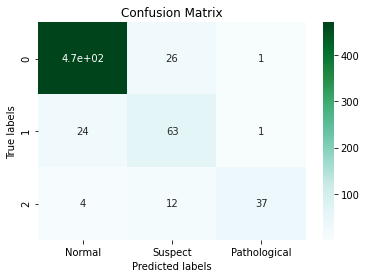

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_logistic_regression), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);